### 1. Import data and libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing Data Sets
path = r'/Users/mariazaremba/Documents/CareerFoundry/Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data_4_8_part_2.pkl'))

### 2. Creating Bar Charts

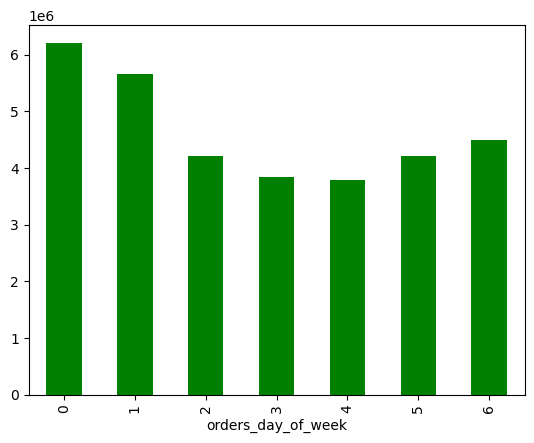

In [3]:
# create a bar chart

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['green'])

### 3. Exporting Charts

In [4]:
# export a chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 4. Creating Histograms and Scatterplots

#### 4.1. Histograms

<Axes: ylabel='Frequency'>

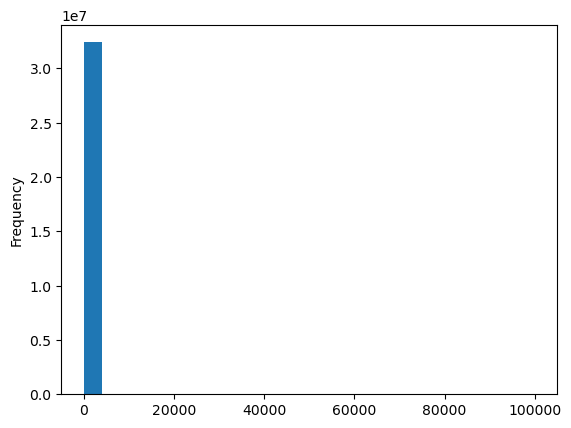

In [5]:
# create a histogram

ords_prods_merge['prices'].plot.hist(bins = 25)

In [6]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [7]:
ords_prods_merge['prices'].mean()

11.980225638383402

In [8]:
ords_prods_merge['prices'].median()

7.4

In [9]:
ords_prods_merge['prices'].max()

99999.0

#### 4.2. Scatterplots

<Axes: xlabel='prices', ylabel='prices'>

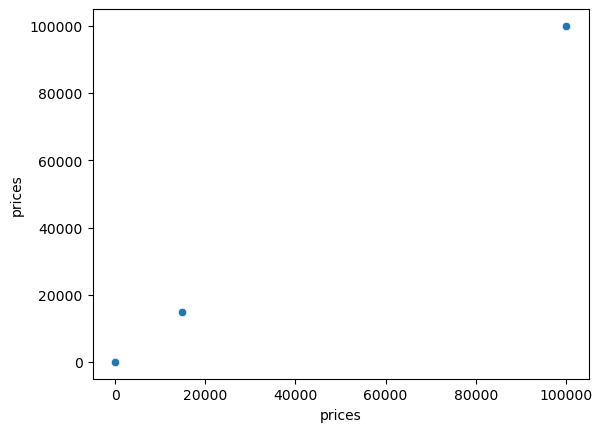

In [10]:
# create a scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [11]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

Unnamed: 0.1  Unnamed: 0_x  order_id  user_id evaluation_set  \
1576               171           171    912404       17          prior   
1638               181           181    603376       17          prior   
16534             1944          1944   3264360      135          prior   
16540             1945          1945    892534      135          prior   
53712             5708          5708    229704      342          prior   
...                ...           ...       ...      ...            ...   
32350634       3411856       3411856   3172853   205650          prior   
32377867       3414691       3414691   2504315   205818          prior   
32377877       3414693       3414693   1108388   205818          prior   
32410707       3418470       3418470   1916142   206049          prior   
32410731       3418473       3418473    379732   206049          prior   

          order_number  orders_day_of_week  order_hour_of_day  \
1576                12                   2                 14   
1638                22                   6                 16   
16534                2                   2                 21   
16540                3                   0                  8   
53712                8                   1                 19   
...                ...                 ...                ...   
32350634            18                   1                  9   
32377867             3                   5                 15   
32377877             5                   4                  5   
32410707             1                   2                 17   
32410731             4                   1                 14   

          days_since_prior_order      customer_type  ...     price_range_loc  \
1576                         5.0  Existing Customer  ...  High-range product   
1638                         4.0  Existing Customer  ...  High-range product   
16534                       13.0  Existing Customer  ...  High-range product   
16540                       12.0  Existing Customer  ...  High-range product   
53712                       30.0  Existing Customer  ...  High-range product   
...                          ...                ...  ...                 ...   
32350634                     7.0  Existing Customer  ...  High-range product   
32377867                     3.0  Existing Customer  ...  High-range product   
32377877                     1.0  Existing Customer  ...  High-range product   
32410707                     NaN       New Customer  ...  High-range product   
32410731                     5.0  Existing Customer  ...  High-range product   

             busiest_day    busiest_days   busiest_hours max_order  \
1576      Regularly busy  Regularly busy  Average orders        40   
1638      Regularly busy  Regularly busy  Average orders        40   
16534     Regularly busy  Regularly busy  Average orders         4   
16540        Busiest day    Busiest days  Average orders         4   
53712     Regularly busy    Busiest days  Average orders        16   
...                  ...             ...             ...       ...   
32350634  Regularly busy    Busiest days  Average orders        25   
32377867  Regularly busy  Regularly busy  Average orders        25   
32377877      Least busy      Least busy  Average orders        25   
32410707  Regularly busy  Regularly busy  Average orders         5   
32410731  Regularly busy    Busiest days  Average orders         5   

              loyalty_flag  average_price  spending_flag  \
1576      Regular customer     108.648299   High spender   
1638      Regular customer     108.648299   High spender   
16534         New customer    1154.792308   High spender   
16540         New customer    1154.792308   High spender   
53712     Regular customer     114.426619   High spender   
...                    ...            ...            ...   
32350634  Regular customer     351.141618   High spender   
32377867  Regular customer     170.073770   High spender  

In [12]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [13]:
ords_prods_merge['prices'].max()

25.0

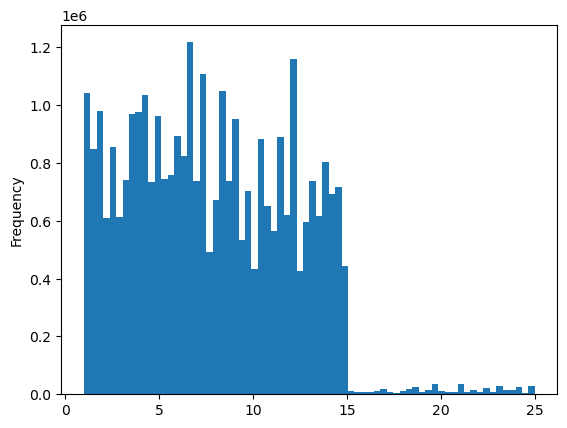

In [14]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [15]:
# export a histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

### 5. Creating Line Charts

#### Sampling Data

In [16]:
np.random.seed(4)

In [17]:
# ctreate a list True/Foulse values to the test np.random.rand() <= 0.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [18]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
np.random.rand(10)

array([0.79555729, 0.6652899 , 0.04000166, 0.90958442, 0.0493868 ,
       0.6829014 , 0.09612088, 0.92855965, 0.51356997, 0.69561069])

In [20]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [21]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [22]:
len(ords_prods_merge)

32435059

In [23]:
len(big)+len(small)

32435059

In [24]:
df_2 = small[['orders_day_of_week','prices']]

/var/folders/_0/wmpx09bn7zbbs6jlk0xtrvnr0000gn/T/ipykernel_3928/2979892408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.replace([np.inf, -np.inf], np.nan, inplace=True)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


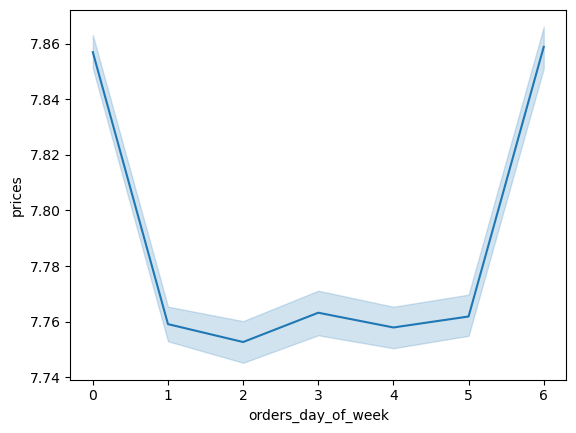

In [25]:
# replace infinite values with NaN
df_2.replace([np.inf, -np.inf], np.nan, inplace=True)

# create the line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')